# Salary prediction notebook

### Introduction, objectives etc

In [3]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# EDA

## Univariate analysis

 Each category

- missing values?
- outliers?
- how many categories for "education"
- how mnay categories for "job title"
- distribution of years of experience? 

In [5]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
df.describe()


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
df['Age'].describe()

count    6702.000000
mean       33.620859
std         7.614633
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

In [8]:
features_considered = ['Age', 'Years of Experience', 'Salary']
z_scores = zscore(df[features_considered], nan_policy = 'omit')
z_scores.head()

,Age,Years of Experience,Salary
0,-0.212877,-0.510797,-0.479839
1,-0.738221,-0.840909,-0.953483
2,1.494490,1.139763,0.656907
3,0.312467,-0.180685,-1.048212
4,2.413841,1.965043,1.604195


# Bivariate analysis

- Correlation between years of experience and salary
- scatterplots
- boxplots (all variables against salary and see if median is similar) 
    to understand what factors really affect salary
- categorical variables and their relationships
- how variables relate to salary

In [9]:
df["Job Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Software Engineer
1                Data Analyst
2              Senior Manager
3             Sales Associate
4                    Director
                ...          
6699    Director of Marketing
6700          Sales Associate
6701        Financial Manager
6702        Marketing Manager
6703          Sales Executive
Name: Job Title, Length: 6704, dtype: object>

In [10]:
unique_values = df['Job Title'].unique()

print(unique_values)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [11]:
to_read = open("Non_CS_Jobs.txt")
Non_CS_Jobs = []
while(True):
    content = to_read.readline()
    if not content:
        break
    content = content.strip()
    Non_CS_Jobs.append(content[1: (len(content) - 1)])

    print(content[1: (len(content) - 1)])


Sales Associate
Director
Marketing Analyst
Product Manager
Sales Manager
Marketing Coordinator
Senior Scientist
HR Manager
Financial Analyst
Project Manager
Customer Service Rep
Operations Manager
Marketing Manager
Senior Engineer
Sales Director
Business Analyst
VP of Operation
Recruiter
Financial Manager
Social Media Specialist
Senior Consultant
Product Designer
CEO
Accountant
Marketing Specialist
Technical Writer
HR Generalist
Project Engineer
Customer Success Rep
Sales Executive
Operations Director
Administrative Assistant
Strategy Consultant
Copywriter
Account Manager
Director of Marketing
Customer Service Manager
Business Intelligence Analyst
Event Coordinator
VP of Finance
Graphic Designer
Social Media Manager
Director of Operations
Junior Accountant
Digital Marketing Manager
Customer Service Representative
Business Development Manager
Senior Financial Analyst
Research Director
Creative Director
Human Resources Director
Content Marketing Manager
Technical Recruiter
Sales Represe

Filtering out non CS jobs 

In [12]:
print(len(df.index))
mask = ~df['Job Title'].isin(Non_CS_Jobs)

# Filter the DataFrame using the mask
filtered_df = df[mask]

print(len(filtered_df.index))
filtered_df.head


6704
3642


<bound method NDFrame.head of        Age  Gender    Education Level           Job Title  \
0     32.0    Male         Bachelor's   Software Engineer   
1     28.0  Female           Master's        Data Analyst   
10    29.0    Male           Master's  Software Developer   
18    25.0  Female         Bachelor's    Data Entry Clerk   
22    30.0    Male         Bachelor's          IT Support   
...    ...     ...                ...                 ...   
6230  32.0  Female                PhD      Data Scientist   
6233  27.0    Male  Bachelor's Degree   Software Engineer   
6244  32.0  Female                PhD      Data Scientist   
6247  27.0    Male  Bachelor's Degree   Software Engineer   
6258  32.0  Female                PhD      Data Scientist   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
10                    3.0   75000.0  
18                    0.0   35000.0  
22                    2.0   50000.0  
...      

Filtering out null values

In [13]:
print(len(filtered_df.index))
filtered_df = filtered_df.dropna(subset = ['Gender']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Education Level']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Job Title']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Salary']).reset_index(drop = True)

filtered_df.isna().sum()[filtered_df.isna().sum()>0]

print(len(filtered_df.index))
filtered_df.isna().sum()

#there are 0 negative salaries in the dataset, or all salaries are valid
condition = filtered_df['Salary'] < 0
count = condition.sum()
print(count)


3642
3638
0


Checking Years of Experience

In [14]:
years_condition = filtered_df['Years of Experience'] < 0
years_count = years_condition.sum()
print(years_count)


0


Checking Age

In [15]:
age_condition = filtered_df['Age'] < 0
age_count = age_condition.sum()
print(age_count)

0


In [16]:
filtered_df["Education Level"].value_counts

<bound method IndexOpsMixin.value_counts of 0              Bachelor's
1                Master's
2                Master's
3              Bachelor's
4              Bachelor's
              ...        
3633                  PhD
3634    Bachelor's Degree
3635                  PhD
3636    Bachelor's Degree
3637                  PhD
Name: Education Level, Length: 3638, dtype: object>

Making Education Levels uniform 

In [17]:
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

filtered_df['Education Level'].replace('Bachelor\'s Degree', 'Bachelor\'s', inplace=True)
filtered_df['Education Level'].replace('Master\'s Degree', 'Master\'s', inplace=True)
filtered_df['Education Level'].replace('phD', 'PhD', inplace=True)
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School']
["Bachelor's" "Master's" 'PhD' 'High School']


In [18]:
filtered_df["Gender"].value_counts


filtered_df = filtered_df.drop(filtered_df[filtered_df['Gender'] == 'Other'].index)
gen_unique_values = filtered_df['Gender'].unique()
print(gen_unique_values)

['Male' 'Female']


# Data preprocessing

- Treat out null values
- Treat outliers
- one-hot encode our categorical columns (gender, education, job title)
- 

Dropping Duplicates
Do we need to drop duplicates? There seems to be many (could be different people with identical data?)

In [19]:
# For investigating duplicates
#filtered_df
#filtered_df.sort_values(['Age','Salary'])

In [20]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the entire DataFrame
#print(filtered_df)

Is 55 duplicates enough to warrant filtering out duplicates?

In [21]:

print(len(filtered_df.index))
indices = []
mydict = {}
for index, row in filtered_df.iterrows():
    a = [row['Age'], row['Gender'], row['Education Level'], row['Years of Experience'], row['Salary']]
    a = tuple(a)
    if a in mydict:
        mydict[a] += 1
        #print(a)
        #print(index)
        indices.append(index)
        #print("HELLO")
    else:
        mydict[a] = 1
print(len(indices))
for i in indices:
    filtered_df.drop(i, inplace = True)

sum = 0
for i in mydict.values():
    if i > 1:
        sum += i - 1

#print(len(indices))
print(len(filtered_df.index))


3624
2738


886


In [22]:

top_five_jobs = filtered_df['Job Title'].value_counts()[:].index.tolist()
print(top_five_jobs)
mask = filtered_df['Job Title'].isin(top_five_jobs)

# Filter the DataFrame using the mask
top_five_jobs_df = filtered_df[mask]
#top_five_jobs_df

['Software Engineer Manager', 'Full Stack Engineer', 'Senior Software Engineer', 'Senior Project Engineer', 'Data Scientist', 'Back end Developer', 'Software Engineer', 'Front end Developer', 'Data Analyst', 'Web Developer', 'Software Developer', 'Junior Web Developer', 'Senior Data Scientist', 'Junior Software Developer', 'Junior Software Engineer', 'Director of Data Science', 'Front End Developer', 'Senior Data Analyst', 'Senior Software Developer', 'Senior Data Engineer', 'Senior UX Designer', 'Junior Data Analyst', 'IT Support Specialist', 'Chief Data Officer', 'Data Entry Clerk', 'IT Support', 'Software Manager', 'Junior Developer', 'UX Designer', 'Network Engineer', 'Help Desk Analyst', 'UX Researcher', 'IT Manager', 'Technical Support Specialist', 'Senior Software Architect', 'Senior IT Consultant', 'Junior UX Designer', 'Chief Technology Officer', 'Senior IT Project Manager', 'Junior Designer', 'Junior Data Scientist', 'Senior IT Support Specialist', 'Junior Web Designer', 'Sof

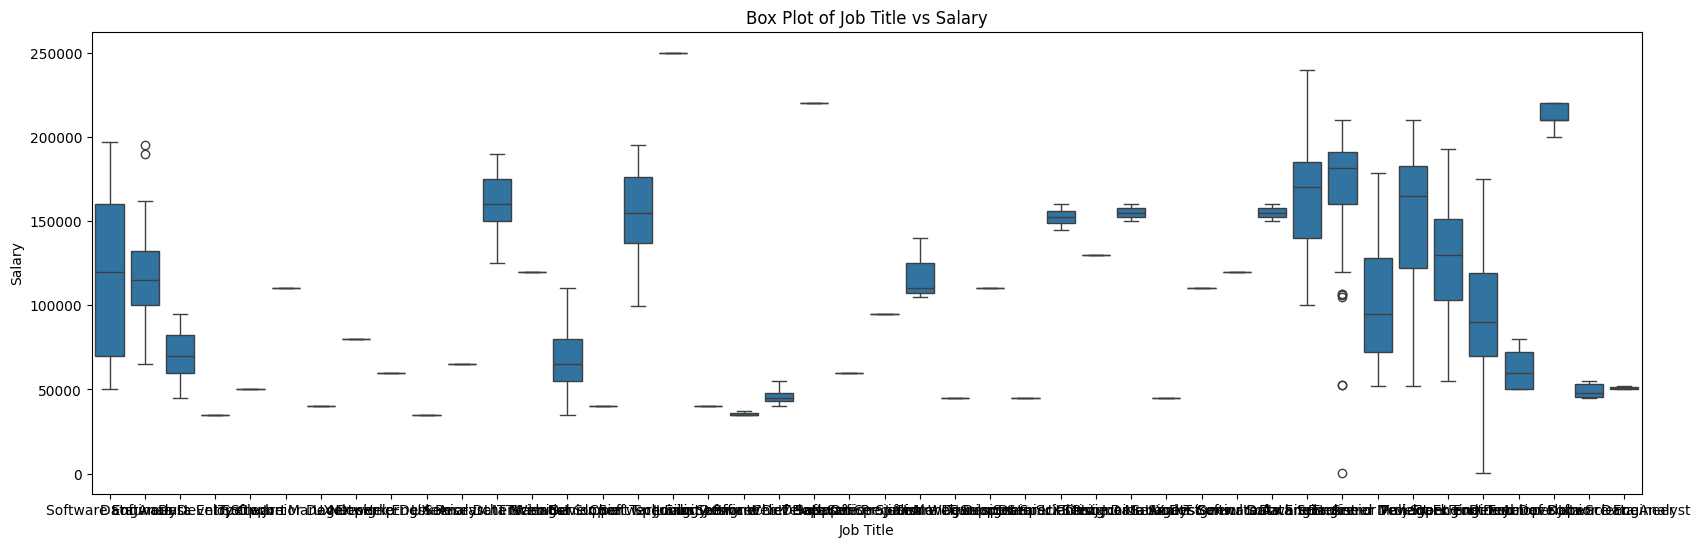

In [23]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Job Title', y='Salary', data=top_five_jobs_df)
plt.title('Box Plot of Job Title vs Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

In [24]:
#one_hot_encoded_data = pd.get_dummies(filtered_df,  dtype=int, columns = ['Education Level', 'Gender', 'Job Title'])
#print(one_hot_encoded_data.head())

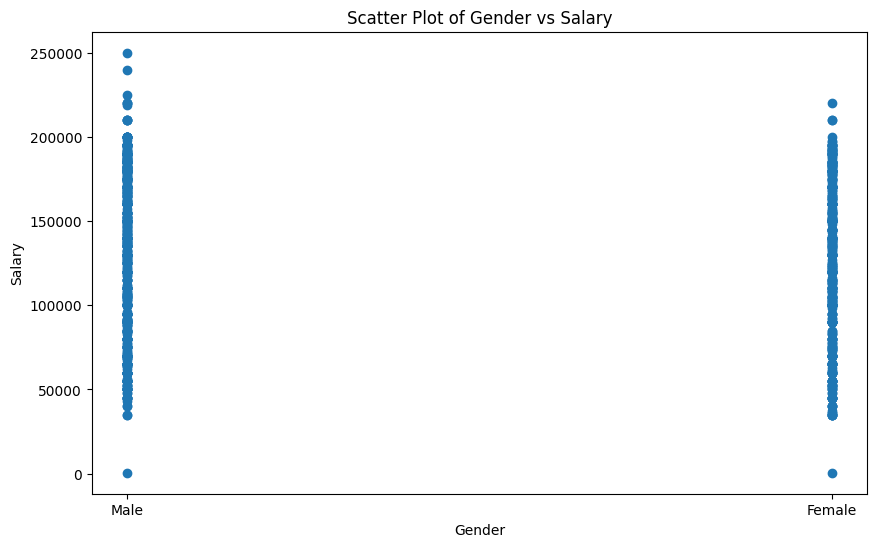

In [25]:



plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Gender'], filtered_df['Salary'])
plt.title('Scatter Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

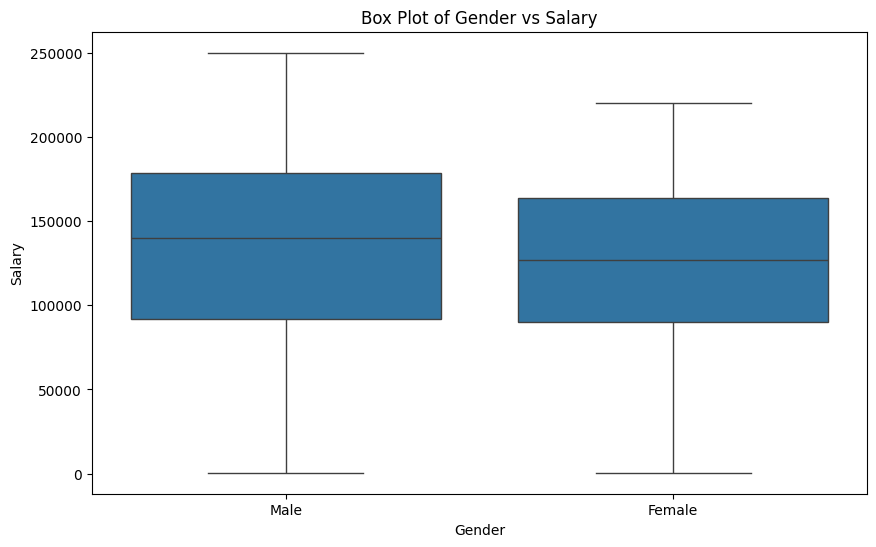

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=filtered_df)
plt.title('Box Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

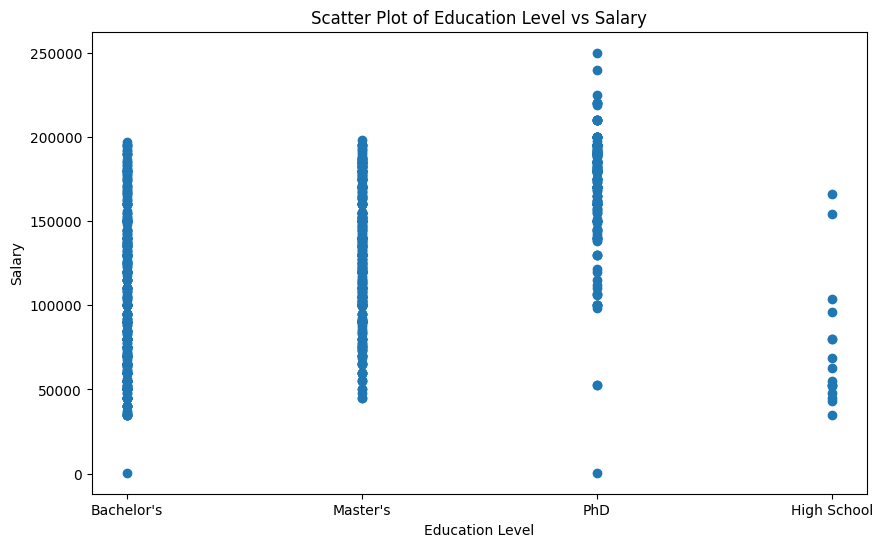

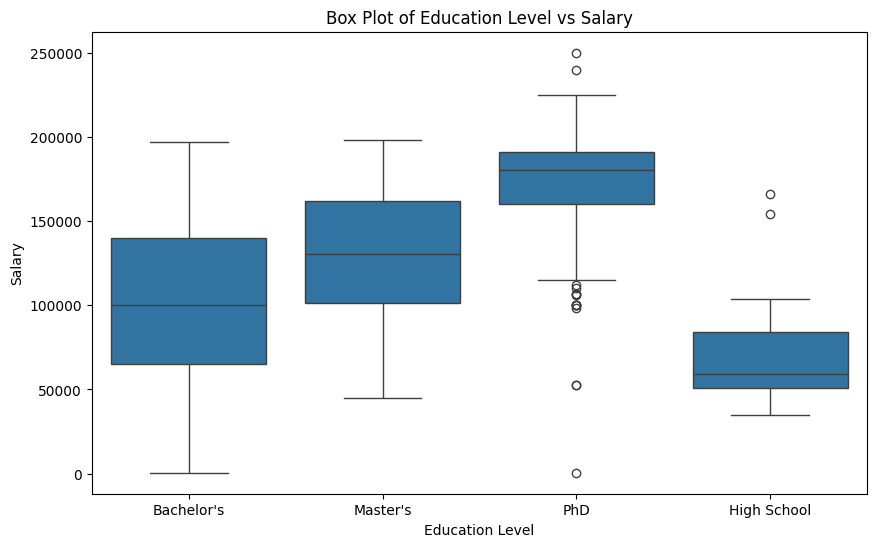

In [27]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Education Level'], filtered_df['Salary'])
plt.title('Scatter Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=filtered_df)
plt.title('Box Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

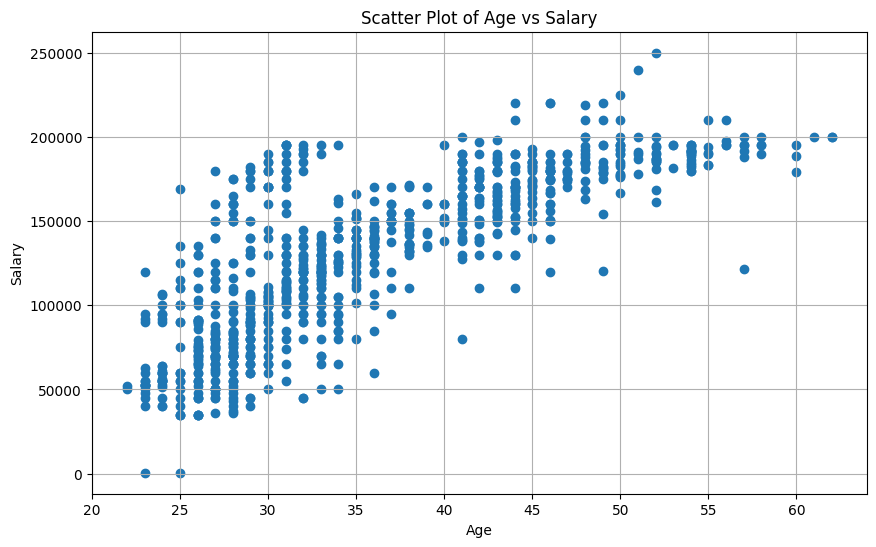

In [28]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

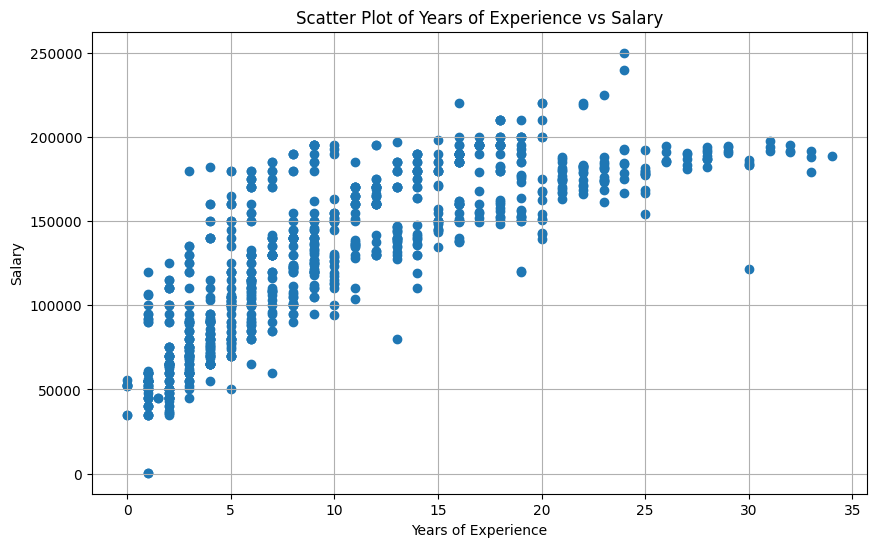

In [29]:

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Years of Experience'], filtered_df['Salary'])
plt.title('Scatter Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

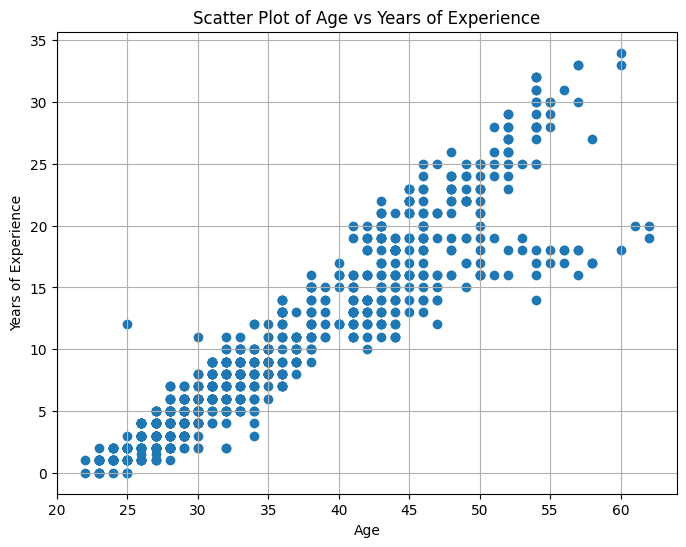

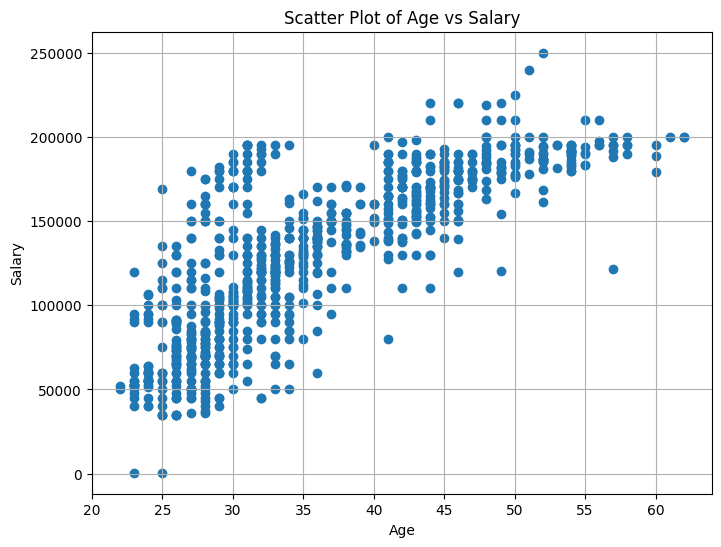

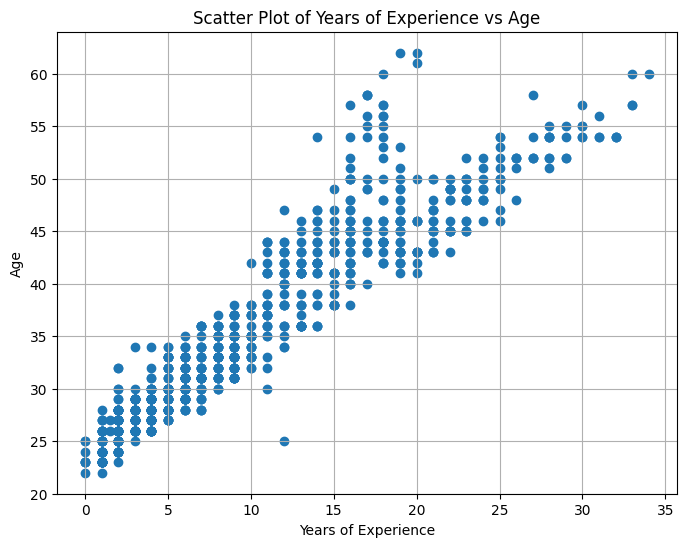

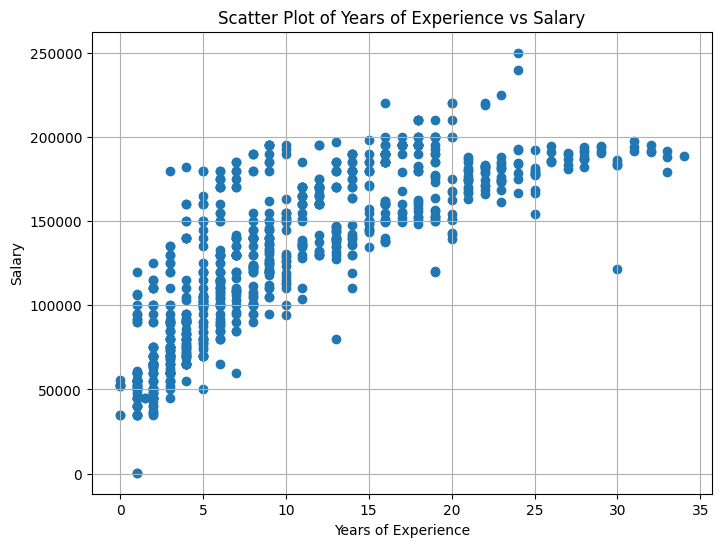

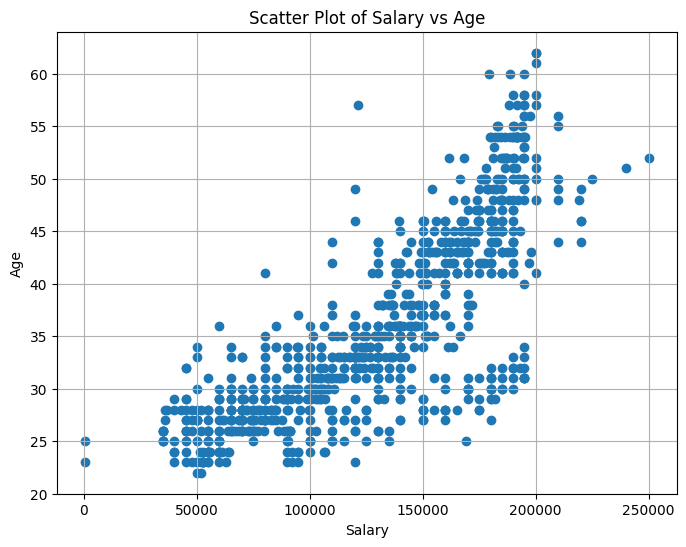

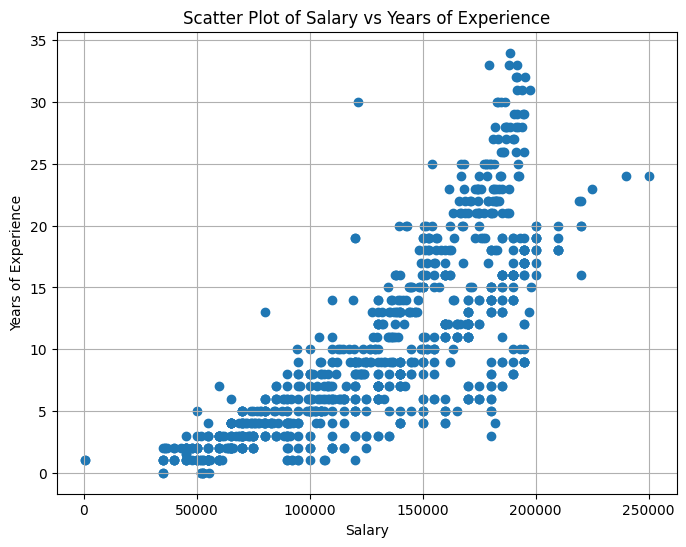

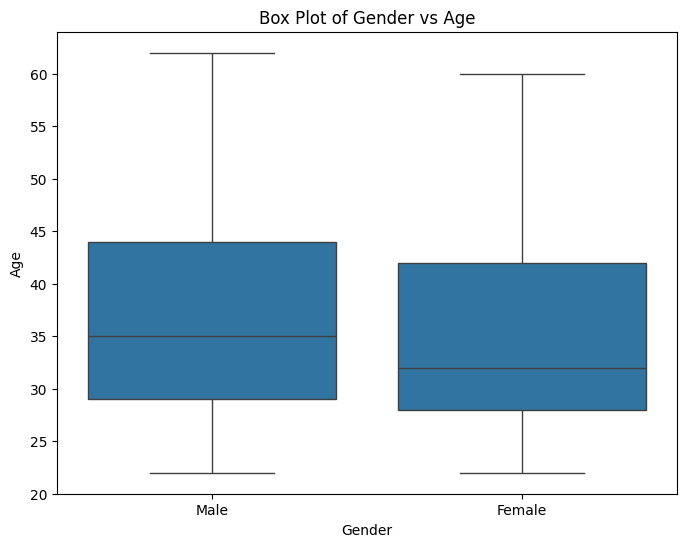

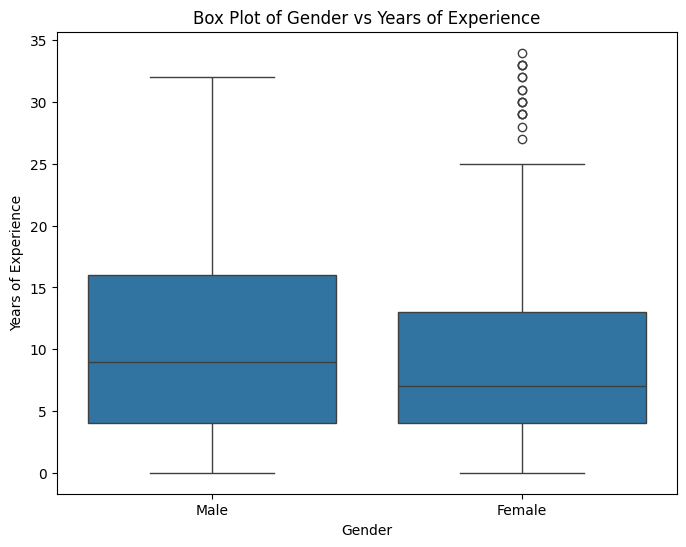

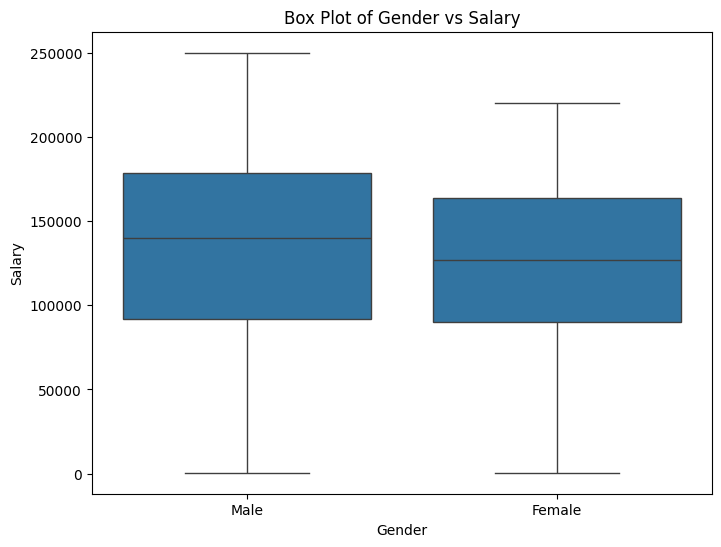

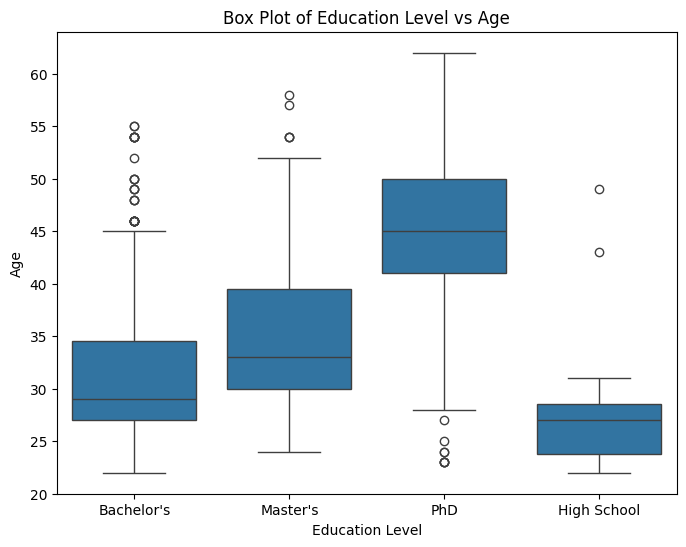

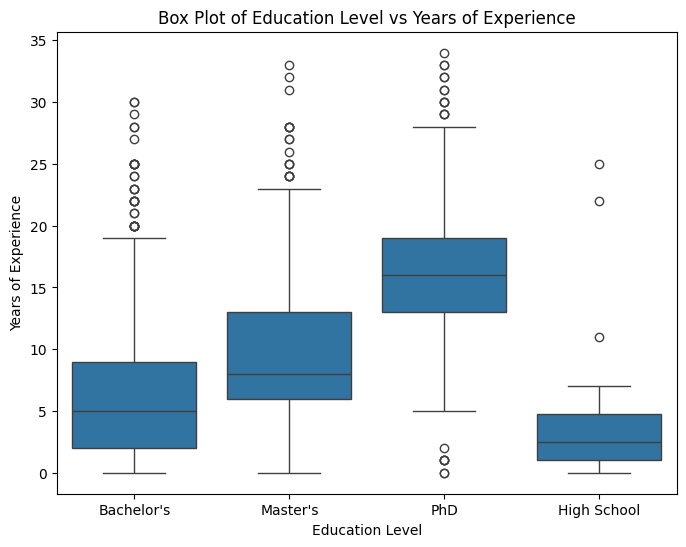

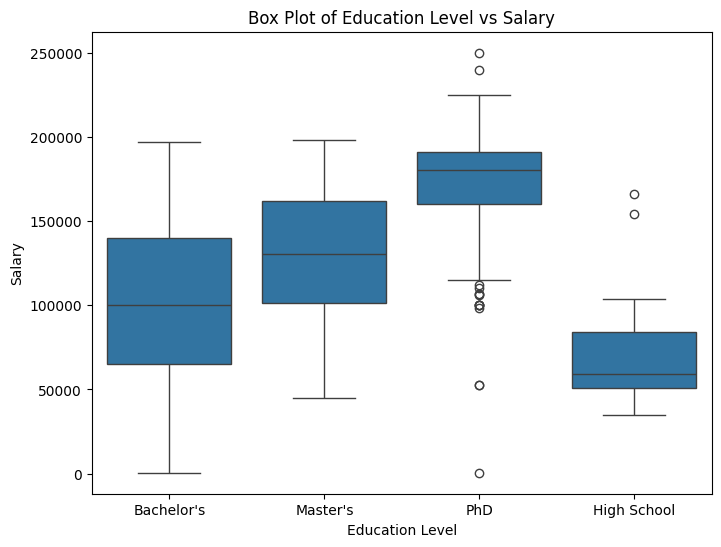

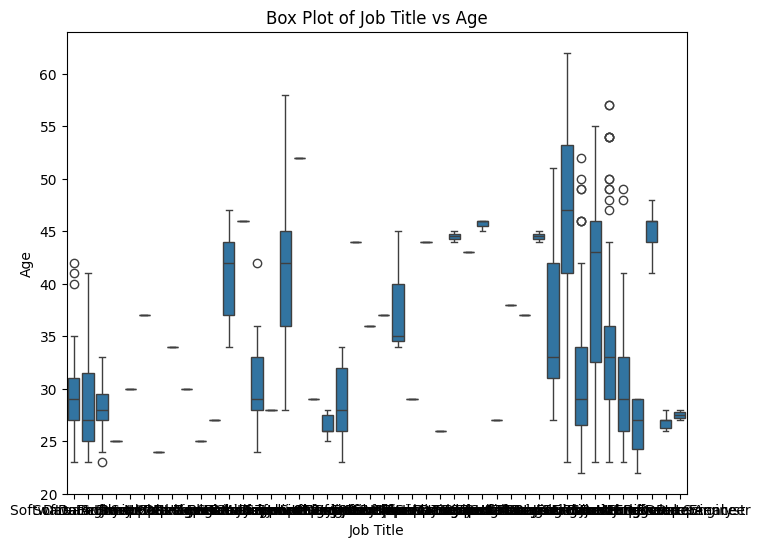

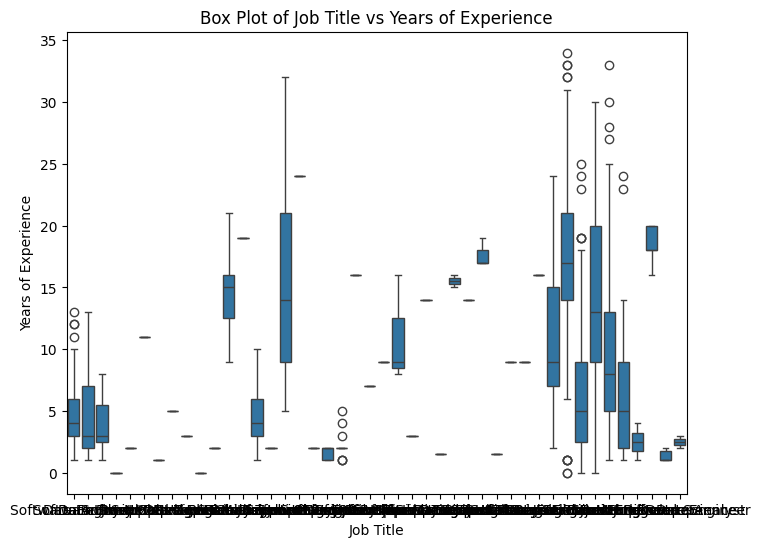

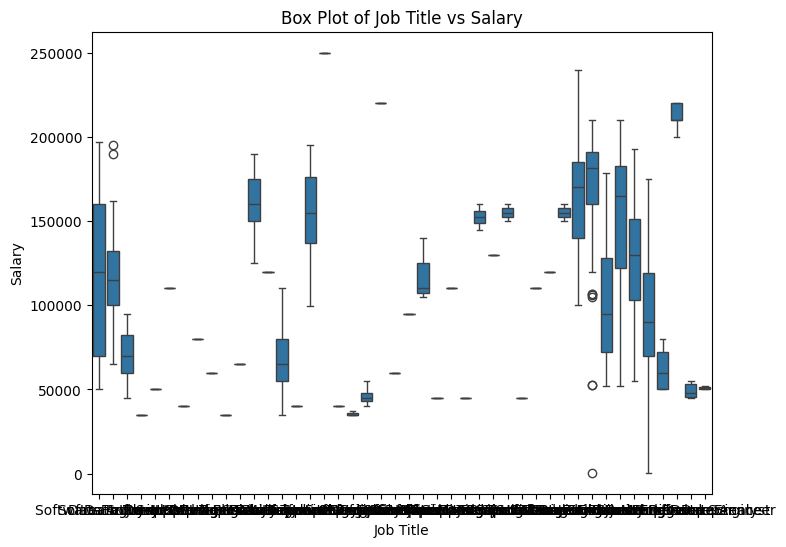

In [30]:
def plot_all_variables(df):
    numeric_vars = df.select_dtypes(include=['int', 'float']).columns
    categorical_vars = df.select_dtypes(include=['object']).columns


    for i, numeric_var1 in enumerate(numeric_vars):
        for j, numeric_var2 in enumerate(numeric_vars):
            if i != j:
                plt.figure(figsize=(8, 6))
                plt.scatter(df[numeric_var1], df[numeric_var2])
                plt.title(f'Scatter Plot of {numeric_var1} vs {numeric_var2}')
                plt.xlabel(numeric_var1)
                plt.ylabel(numeric_var2)
                plt.grid(True)
                plt.show()

    
    for categorical_var in categorical_vars:
        for numeric_var in numeric_vars:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=categorical_var, y=numeric_var, data=df)
            plt.title(f'Box Plot of {categorical_var} vs {numeric_var}')
            plt.xlabel(categorical_var)
            plt.ylabel(numeric_var)
            plt.show()


plot_all_variables(filtered_df)

<Figure size 1000x600 with 0 Axes>

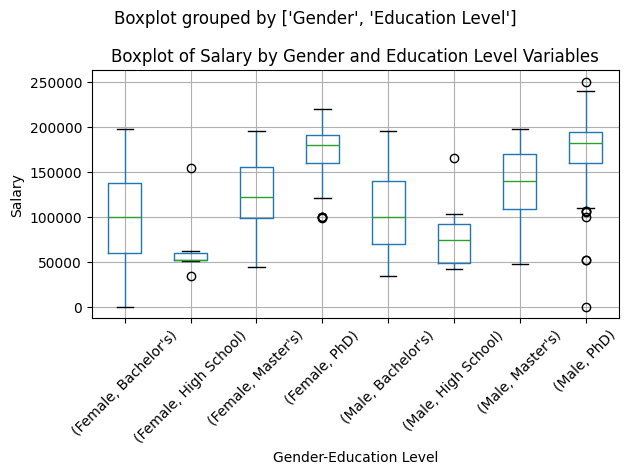

In [31]:

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Salary', by=['Gender', 'Education Level'])


plt.xlabel('Gender-Education Level')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Gender and Education Level Variables')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

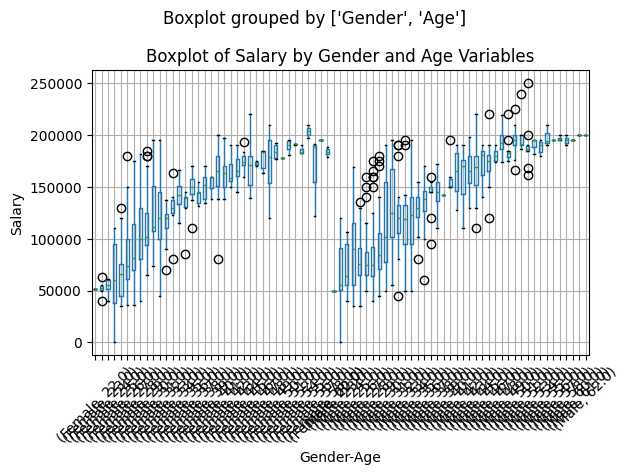

In [32]:

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Salary', by=['Gender', 'Age'])


plt.xlabel('Gender-Age')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Gender and Age Variables')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [33]:
filtered_df.to_csv('Processed_Data.csv')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [35]:
X = filtered_df.drop('Salary', axis = 1)
Y = filtered_df['Salary']


numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

In [36]:
import pickle
lmd = [0.1]
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

for i in lmd:
    
    lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge(alpha = i))])

    
    lr_pipeline.fit(X_train, y_train)

    accuracy.append(np.mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5)))
    
 
    y_pred = lr_pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse:.2f}')
    print(f'R^2: {r2:.2f}')

for i in accuracy:
    print("accuracy of model on unforseen data:",i)

sample = pd.DataFrame
with open("linear_regression_model.pkl","wb") as f:
    pickle.dump(lr_pipeline, f)

RMSE: 21917.44
R^2: 0.76
accuracy of model on unforseen data: 0.7830169569655718


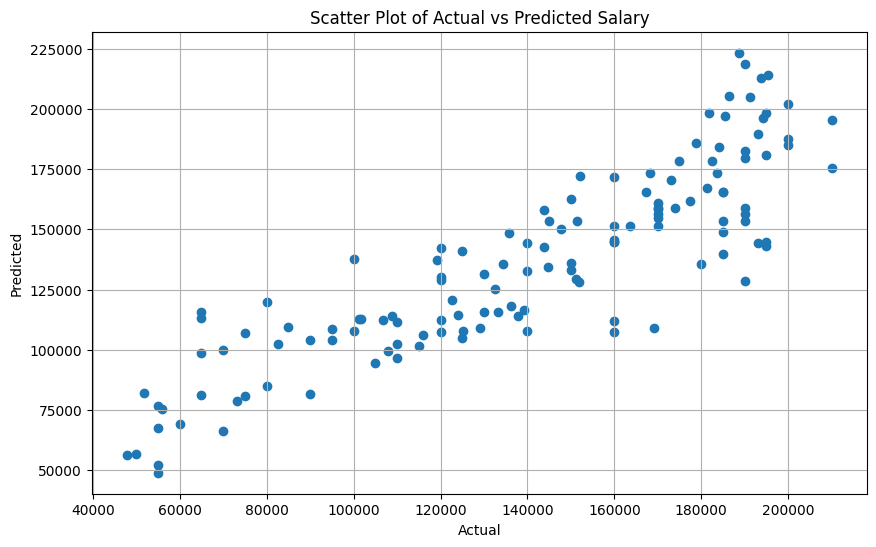

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Scatter Plot of Actual vs Predicted Salary')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

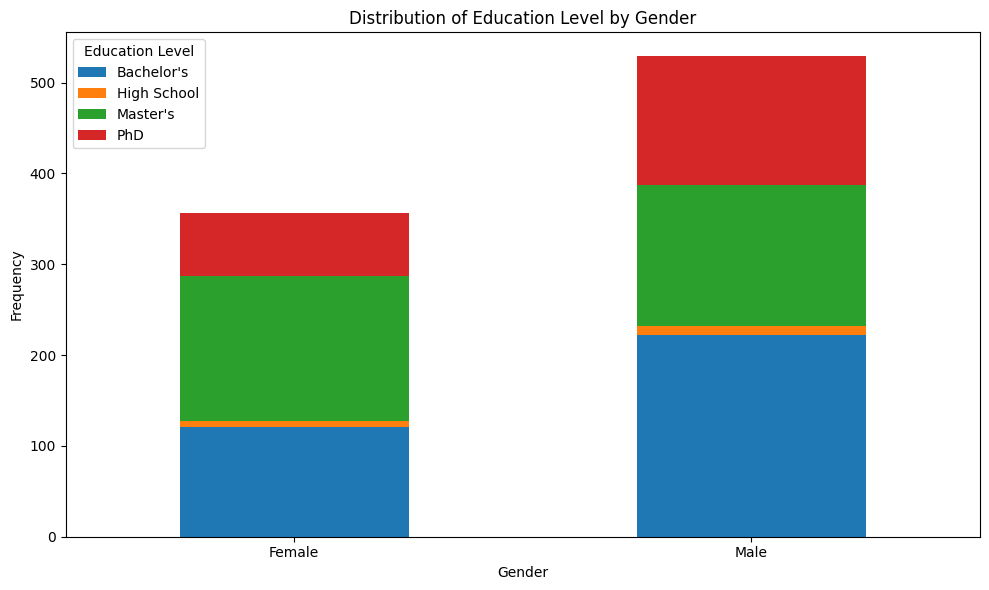

886


In [41]:
grouped_data = filtered_df.groupby(['Gender', 'Education Level']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Education Level by Gender')
plt.xticks(rotation=0)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()
print(len(filtered_df))